In [1]:
#importaciones
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import _converter
%matplotlib inline 
plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
import datetime
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [2]:
df_generos = pd.read_csv('../datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv', parse_dates=['fechanacimiento'])
df_generos = df_generos.loc[df_generos['sexo'] != 'NO_DECLARA']

df_posts = pd.read_csv('../datos_navent_fiuba/fiuba_4_postulaciones.csv', parse_dates=['fechapostulacion'])
df_detalles = pd.read_csv('../datos_navent_fiuba/fiuba_6_avisos_detalle.csv', usecols=['idaviso','tipo_de_trabajo','nivel_laboral','nombre_area','denominacion_empresa'])

df_posts_completo = df_generos.merge(df_posts, on='idpostulante')

df_avisos_postulantes = df_posts_completo.merge(df_detalles, on='idaviso')

# tabla cruzada con frecuencia de sexo FEM y MASC
ct = pd.crosstab(df_avisos_postulantes['nombre_area'], df_avisos_postulantes['sexo'])

In [3]:
# columnas para comparar y reordenar
ct['tot'] = ct['FEM'] + ct['MASC']
ct['diff'] = ct['FEM'] - ct['MASC']
ct = ct.sort_values(by='diff', ascending=False)

# tomo los top 10 y preparo para graficar
ct_top_fem_stacked = ct.head(10)[['FEM', 'MASC']].stack().reset_index().rename(columns={0:'count'})

# el iloc[::-1] es para invertirlo dado que estamos tomando los 10 ultimos en forma descendiente
ct_top_masc_stacked = ct.tail(10).iloc[::-1][['FEM', 'MASC']].stack().reset_index().rename(columns={0:'count'})

Text(0.5,0.98,'Areas con mayor diferencia en sexo. Predominancia femenina')

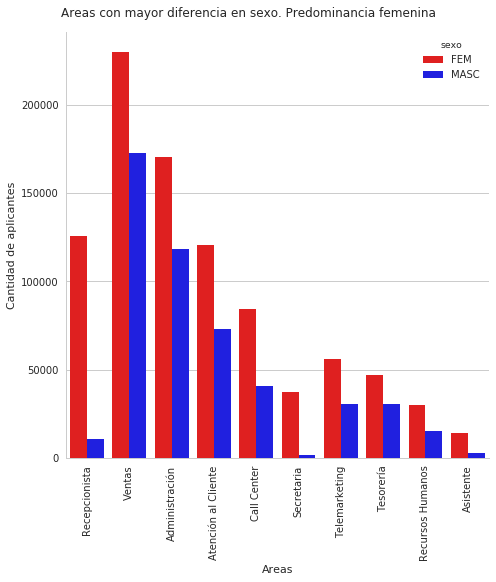

In [5]:
# caso fem
g = sns.factorplot(x='nombre_area', 
                   y='count',
                   data=ct_top_fem_stacked,
                   hue='sexo',
                   palette= {'FEM': 'red', 'MASC': 'blue'},
                   errwidth=0.8,
                   kind="bar",
                   legend_out=False,
                   size=7)

g.set_xticklabels(rotation=90)

g.set_axis_labels("Areas", "Cantidad de aplicantes")

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Areas con mayor diferencia en sexo. Predominancia femenina')

Text(0.5,0.98,'Areas con mayor diferencia en sexo. Predominancia masculina')

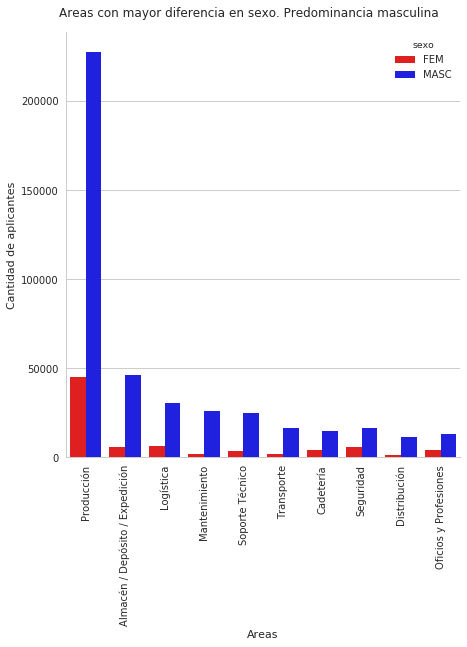

In [6]:
# caso masc
g = sns.factorplot(x='nombre_area', 
                   y='count',
                   data=ct_top_masc_stacked,
                   hue='sexo',
                   palette= {'FEM': 'red', 'MASC': 'blue'},
                   errwidth=0.8,
                   kind="bar",
                   legend_out=False,
                   size=7)

g.set_xticklabels(rotation=90)
g.set_axis_labels("Areas", "Cantidad de aplicantes")

plt.subplots_adjust(top=0.93)
g.fig.suptitle('Areas con mayor diferencia en sexo. Predominancia masculina')